# Praca domowa 6

## Zadanie 1


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("house_data.csv")

1. Jaka jest średnia cena nieruchomości położonych nad wodą, których jakoś wykończenia jest równa lub większa od mediany jakości wykończenia?


In [7]:
gr = df.grade.median()
df1 = df.loc[(df.waterfront == 1) & (df.grade >= gr)]
df1.price.mean()

1784151.7006802722

Odp: 1784151.7006802722

2. Czy nieruchomości o 2 piętrach mają większą (w oparciu o wartości mediany) liczbę łazienek niż nieruchomości o 3 piętrach?


In [16]:
p2 = df.loc[df.floors == 2].floors.median()
p3 = df.loc[df.floors == 3].floors.median()
p2 > p3

False

Odp: Nie

3. Jak wygląda wartość kwartyla 0.25 oraz 0.75 jakości wykończenia nieruchomości położonych na północy biorąc pod uwagę czy ma ona widok na wodę czy nie ma?

In [51]:
w0_25 = df.loc[(df.lat > 47.61) & (df.waterfront == 0)].grade.quantile(q = 0.25)
w0_75 = df.loc[(df.lat > 47.61) & (df.waterfront == 0)].grade.quantile(q = 0.75)
w1_25 = df.loc[(df.lat > 47.61) & (df.waterfront == 1)].grade.quantile(q = 0.25)
w1_75 = df.loc[(df.lat > 47.61) & (df.waterfront == 1)].grade.quantile(q = 0.75)
[w0_25, w0_75, w1_25, w1_75]

[7.0, 8.0, 8.0, 11.0]

Odp: Dla nieróchomości bez widku na wodę q_0.25 = 7, q_0.75 = 8.
Dla nieróchomości z widokiem na wodę q_0.25 = 8, q_0.75 = 11.

4. Pod którym kodem pocztowy jest położonych najwięcej nieruchomości i jaki jest rozstęp miedzykwartylowy dla ceny nieruchomości położonych pod tym adresem?

In [32]:
df.groupby("zipcode").id.agg("count").sort_values(ascending = False)
q1 = df[df.zipcode == 98103].price.quantile(0.25)
q3 = df[df.zipcode == 98103].price.quantile(0.75)
iqr = q3 - q1
iqr

262875.0

Odp: Kod pocztowy: 98-103
IQR = 262875

5. Ile procent nieruchomości ma wyższą średnią powierzchnię 15 najbliższych sąsiadów względem swojej powierzchni?

In [40]:
n = df.id.count()
p = df[df.sqft_living15 > df.sqft_living].id.count()
p/n*100

42.594734650441865

Odp: Ok. 42,6 %

 6. O ile procent więcej jest nieruchomości leżcych na północy zachód niż  nieruchomości leżących na południowy wschód?

In [50]:
n = df.id.count()
n_w = df[(df.lat > 47.61) & (df.long < -122.33)].id.count()
s_e = df[(df.lat < 47.61) & (df.long > -122.33)].id.count()
(n_w-s_e)/n*100

-33.23462730763892

Odp: Niruchomości leżących na N-W jest o ok. 33,2 % mniej niż leżących na S_E. Jako punkt oniesienia wybrałam współrzędne geograficzne Seattle (47.61, -122.33).

# Zadanie 2

Dla wybranej zmiennej ze zbioru danych z Zadania 1 narysuj:

a) rozkład zmiennej jakościowej

b) rozkład zmiennej ilościowej

c) rozkład dwóch zmiennych (dowolna kombinacja jakościowej i ilościowej)

a)

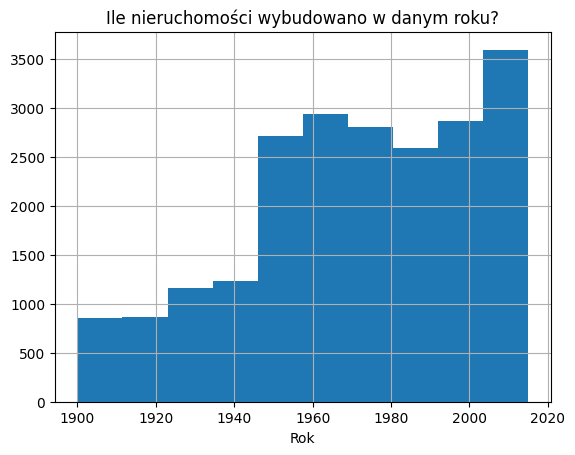

In [14]:
df.hist("yr_built")
plt.title('Ile nieruchomości wybudowano w danym roku?')
plt.xlabel('Rok')
plt.show()


b)

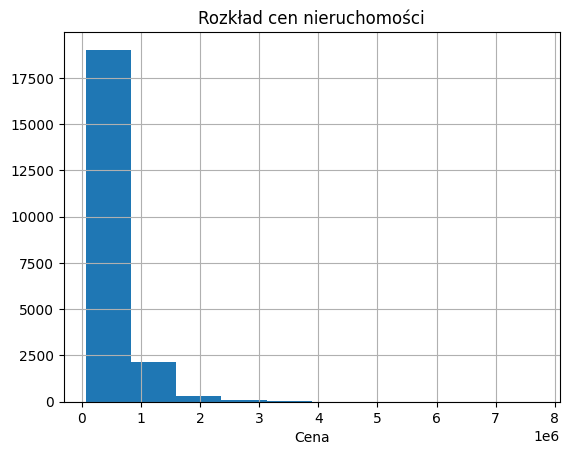

In [26]:
df.hist("price")
plt.title('Rozkład cen nieruchomości')
plt.xlabel('Cena')
plt.show()


c)

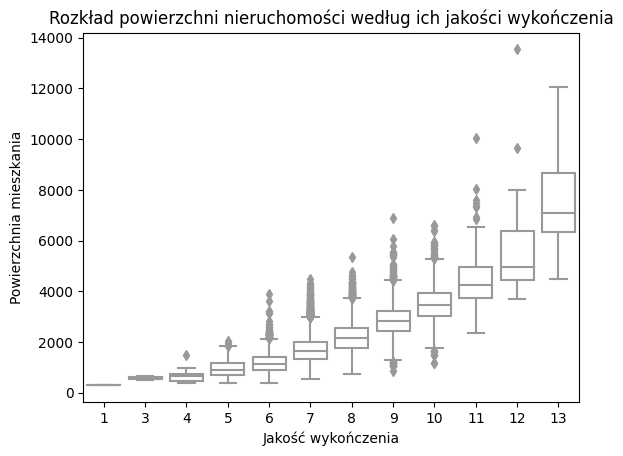

In [18]:
sns.boxplot(data=df, x="grade", y="sqft_living", color='w')
plt.title('Rozkład powierzchni nieruchomości według ich jakości wykończenia')
plt.xlabel('Jakość wykończenia')
plt.ylabel('Powierzchnia mieszkania')
plt.show()